<a href="https://colab.research.google.com/github/ShunsukeT15/mamachari/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [18]:
%run prepare_images.py datasets/mydata

Copied images from datasets/mydata/stop


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.7.0
class number=1
['stop']


Found 68 images belonging to 1 classes.
Found 21 images belonging to 1 classes.
## Train Data Sample ##


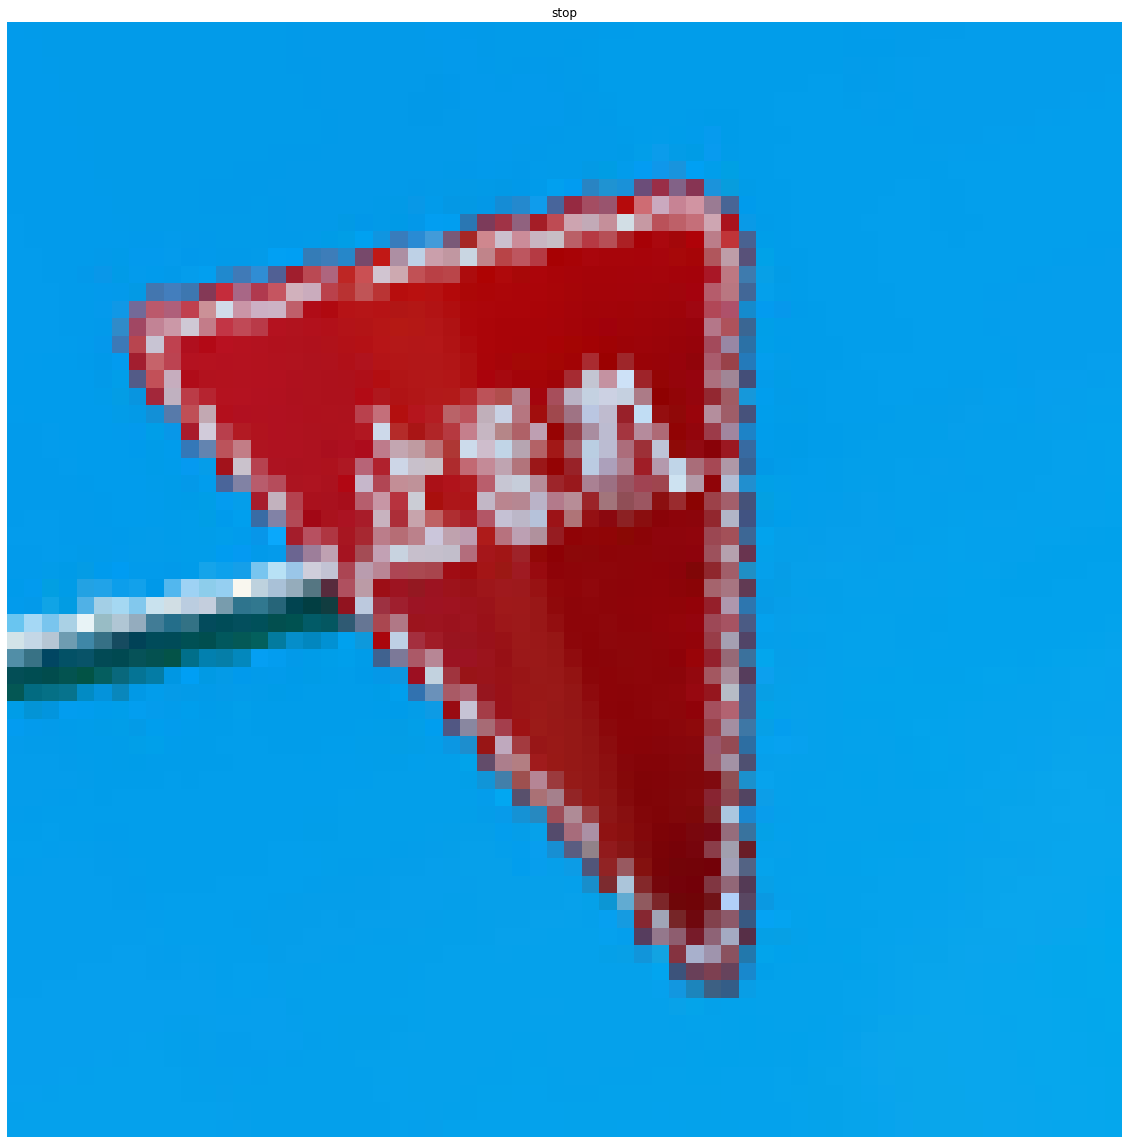

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 activation_16 (Activation)  (None, 64, 64, 8)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 8)         584       
                                                                 
 activation_17 (Activation)  (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 7688)              0         
                                                      

In [24]:
# 学習率
LEARNING_RATE = 0.0005
# エポック（世代数）
EPOCHS = 15
# バッチサイズ
BATCH_SIZE = 8

IMAGE_SIZE = 64

#train_data_gen = ImageDataGenerator(rescale=1./255)
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=30)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=60,channel_shift_range=5.,brightness_range=[0.3, 1.0],zoom_range=0.5,horizontal_flip=0.3,vertical_flip=0.3)
val_data_gen = ImageDataGenerator(rescale=1./255,rotation_range=15)
#val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(21, 1)
#0 Expected:stop -> Predicted:stop
File: stop/S__54026290.jpg
Each Prediction Value: [1.]
* Correct *
#1 Expected:stop -> Predicted:stop
File: stop/S__54059048.jpg
Each Prediction Value: [1.]
* Correct *
#2 Expected:stop -> Predicted:stop
File: stop/S__54091795.jpg
Each Prediction Value: [1.]
* Correct *
#3 Expected:stop -> Predicted:stop
File: stop/S__54132744.jpg
Each Prediction Value: [1.]
* Correct *
#4 Expected:stop -> Predicted:stop
File: stop/S__54132747.jpg
Each Prediction Value: [1.]
* Correct *
#5 Expected:stop -> Predicted:stop
File: stop/S__54132751.jpg
Each Prediction Value: [1.]
* Correct *
#6 Expected:stop -> Predicted:stop
File: stop/S__54132758.jpg
Each Prediction Value: [1.]
* Correct *
#7 Expected:stop -> Predicted:stop
File: stop/S__54132769.jpg
Each Prediction Value: [1.]
* Correct *
#8 Expected:stop -> Predicted:sto

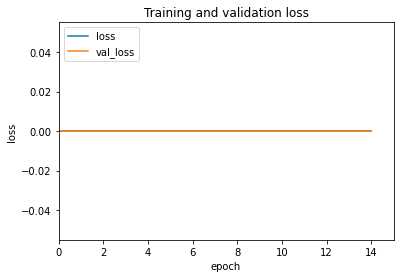

Accuracy


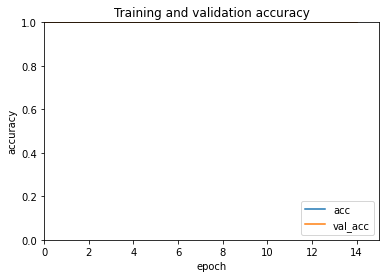

Confusion Matrix


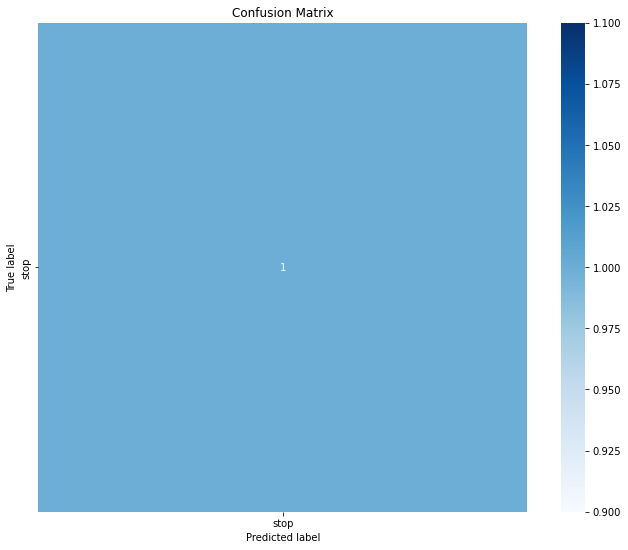

In [25]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

In [11]:
visualize.vis_filter(model, 'conv2d')
visualize.vis_filter(model, 'conv2d_1')

Visualize filter: conv2d


ValueError: ignored

In [26]:
!cat incorrect.txt

In [27]:
!cat correct.txt

target_datasets/val/stop/S__54026290.jpg
target_datasets/val/stop/S__54059048.jpg
target_datasets/val/stop/S__54091795.jpg
target_datasets/val/stop/S__54132744.jpg
target_datasets/val/stop/S__54132747.jpg
target_datasets/val/stop/S__54132751.jpg
target_datasets/val/stop/S__54132758.jpg
target_datasets/val/stop/S__54132769.jpg
target_datasets/val/stop/S__54132774.jpg
target_datasets/val/stop/S__54132778.jpg
target_datasets/val/stop/S__54132782.jpg
target_datasets/val/stop/keikai1.png
target_datasets/val/stop/stop_val2.jpg
target_datasets/val/stop/suzu1.jpg
target_datasets/val/stop/suzu2.jpg
target_datasets/val/stop/止まれ10.jpg
target_datasets/val/stop/止まれ12.jpg
target_datasets/val/stop/止まれ17.jpg
target_datasets/val/stop/止まれ18.jpg
target_datasets/val/stop/止まれ2.jpg
target_datasets/val/stop/止まれ8.jpg


In [ ]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1', IMAGE_SIZE)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 64, 64, 8)         224       
                                                                 
 activation_34 (Activation)  (None, 64, 64, 8)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 62, 62, 8)         584       
                                                                 
 activation_35 (Activation)  (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 8)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 7688)              0         
                                                     

ValueError: ignored